In [2]:
%run ./PPS_Expansion_Model.ipynb

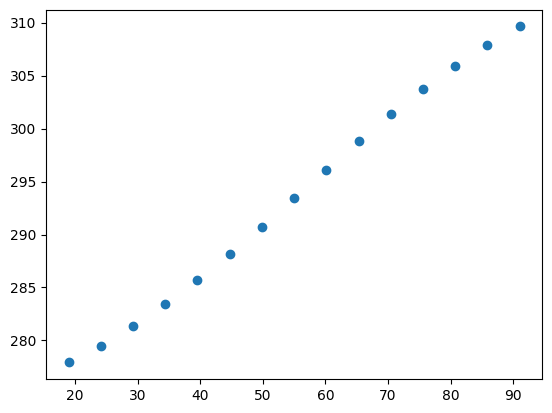

In [4]:
# Distance points in cm (network coordinates)
s_distances = np.asarray([2700, 2200, 1500, 800, 300]) / 1000
ts = np.linspace(s_distances[0], s_distances[-1], 15)
v = 30  # cm/s
a_distances = 100 - ts * v  # distance points in cm (network coordinates)

ts = 0.4
simtime = 200

##Pre-Training
###Healthy Controls
ymin = 270.0
ymax = 318.5
fprHCCP = 100 - 1.448 * v
fprHCS = 1 / 0.0435

HC_RTs = RTsig(a_distances, fprHCCP, fprHCS)
plt.scatter(a_distances, HC_RTs)

In [5]:
from scipy.optimize import differential_evolution

HCLt, HCLa, HCLv = Lw(
    Lex_t=0.15,
    Lin_t=0.05,
    sigmaex_t=1,
    sigmain_t=4,
    Lex_a=0.15,
    Lin_a=0.05,
    sigmaex_a=20,
    sigmain_a=80,
    Lex_v=0.15,
    Lin_v=0.05,
    sigmaex_v=1,
    sigmain_v=4,
)

HCWat, HCWvt, HCWav = cross_modal(at=0.05, sigat=2, vt=0.05, sigvt=2, av=0.05, sigav=2)


def boundary_hc_model_run(theta):
    # feedforward and feedback
    HCWt, HCWa, HCWv, HCBt, HCBa, HCBv = FwFb(
        Wt_0=6.5,
        Wa_0=6.5,
        Wv_0=6.5,
        Bt_0=2.5,
        Ba_0=2.5,
        Bv_0=2.5,
        k1=theta[0],
        k2=theta[1],
        lim=theta[2],
        alpha=theta[3],
    )

    _, _, _, _, HCrt = experiment(
        ts=ts,
        T=simtime,
        dist=a_distances,
        ya=5,
        Lt=HCLt,
        La=HCLa,
        Lv=HCLv,
        Wt=HCWt,
        Wa=HCWa,
        Wv=HCWv,
        Bt=HCBt,
        Ba=HCBa,
        Bv=HCBv,
        Wat=HCWat,
        Wvt=HCWvt,
        Wav=HCWav,
        FWpr=0,
        CMpr=0,
    )

    HC_Model_RTs = fit_RT(xf=HCrt, yf=HC_RTs)
    cost = np.sum(np.square(np.divide(HC_RTs - (HC_Model_RTs), HC_RTs)))

    return cost * 100000


bounds = [(1, 50), (500, 1000), (20, 80), (0.25, 1)]  # k1, k2, lim, alpha
boundary_hc_res = differential_evolution(
    boundary_hc_model_run,
    bounds,
    disp=True,
    workers=30,
    updating="deferred",
    polish=False,
)

differential_evolution step 1: f(x)= 2.1059440777091853
differential_evolution step 2: f(x)= 2.1059440777091853
differential_evolution step 3: f(x)= 2.1059440777091853
differential_evolution step 4: f(x)= 1.589857823506489
differential_evolution step 5: f(x)= 1.589857823506489
differential_evolution step 6: f(x)= 1.589857823506489
differential_evolution step 7: f(x)= 1.5652549917834093
differential_evolution step 8: f(x)= 1.5652549917834093
differential_evolution step 9: f(x)= 1.5652549917834093
differential_evolution step 10: f(x)= 1.5652549917834093
differential_evolution step 11: f(x)= 1.5652549917834093
differential_evolution step 12: f(x)= 1.5652549917834093
differential_evolution step 13: f(x)= 1.5652549917834093
differential_evolution step 14: f(x)= 1.1328851753832723
differential_evolution step 15: f(x)= 1.1328851753832723
differential_evolution step 16: f(x)= 1.0794418643299228
differential_evolution step 17: f(x)= 1.0794418643299228
differential_evolution step 18: f(x)= 1.079

In [7]:
print(boundary_hc_res)

             message: Optimization terminated successfully.
             success: True
                 fun: 0.6317568249755695
                   x: [ 2.603e+01  7.795e+02  2.009e+01  9.415e-01]
                 nit: 119
                nfev: 7200
          population: [[ 2.603e+01  7.795e+02  2.009e+01  9.415e-01]
                       [ 2.612e+01  8.093e+02  2.004e+01  9.426e-01]
                       ...
                       [ 2.605e+01  8.019e+02  2.006e+01  9.413e-01]
                       [ 2.596e+01  8.348e+02  2.010e+01  9.403e-01]]
 population_energies: [ 6.318e-01  6.318e-01 ...  6.318e-01  6.318e-01]


In [8]:
## Fitted model
HCLt, HCLa, HCLv = Lw(
    Lex_t=0.15,
    Lin_t=0.05,
    sigmaex_t=1,
    sigmain_t=4,
    Lex_a=0.15,
    Lin_a=0.05,
    sigmaex_a=20,
    sigmain_a=80,
    Lex_v=0.15,
    Lin_v=0.05,
    sigmaex_v=1,
    sigmain_v=4,
)

HCWat, HCWvt, HCWav = cross_modal(at=0.05, sigat=2, vt=0.05, sigvt=2, av=0.05, sigav=2)

HCWt, HCWa, HCWv, HCBt, HCBa, HCBv = FwFb(
    Wt_0=6.5,
    Wa_0=6.5,
    Wv_0=6.5,
    Bt_0=2.5,
    Ba_0=2.5,
    Bv_0=2.5,
    k1=2.603e01,
    k2=7.795e02,
    lim=2.009e01,
    alpha=9.415e-01,
)

zt, za, zm, zv, HC_Model_RTs = experiment(
    ts=ts,
    T=simtime,
    dist=a_distances,
    ya=5,
    Lt=HCLt,
    La=HCLa,
    Lv=HCLv,
    Wt=HCWt,
    Wa=HCWa,
    Wv=HCWv,
    Bt=HCBt,
    Ba=HCBa,
    Bv=HCBv,
    Wat=HCWat,
    Wvt=HCWvt,
    Wav=HCWav,
    FWpr=0,
    CMpr=0,
)

HC_Model_RTs_scaled = fit_RT(xf=HC_Model_RTs, yf=HC_RTs)

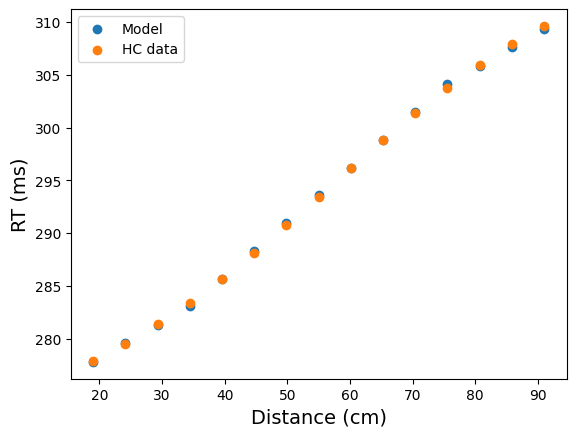

In [10]:
plt.scatter(a_distances, HC_Model_RTs_scaled, label="Model")
plt.scatter(a_distances, HC_RTs, label="HC data")
plt.ylabel("RT (ms)", size=14)
plt.xlabel("Distance (cm)", size=14)
plt.legend(prop={"size": 12})
plt.legend()